<a href="https://colab.research.google.com/github/AtharvKC/Mechanical-Properties-from-Stress-Strain-Curves/blob/main/Mechanical_Properties_from_Stress_Strain_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mechanical Properties from Stress-Strain Curves

# **DATA ANALYTICS LABORATORY**


---


# PRACTICAL NO. 2

---

**ATHARV KISHOR CHAUDHARI**

*B.E. - B*

*ROLL NO. 08*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas==1.2.0
!pip install xlrd==1.2.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print("NumPy version:",np.__version__)
print("Pandas version:",pd.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
NumPy version: 1.21.6
Pandas version: 1.2.0


In [ ]:
df_steel = pd.read_excel('./drive/My Drive/Colab Notebooks/MECHANICAL PROPERTIES FOR STRESS STRAIN CURVE/steel1045.xls')
df_al = pd.read_excel('./drive/My Drive/Colab Notebooks/MECHANICAL PROPERTIES FOR STRESS STRAIN CURVE/aluminum6061.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [ ]:
df_steel.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN


In [ ]:
df_al.head()


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN


We see a number of columns in each dataframe. The columns we are interested in are FORCE, EXT, and CH5. Below is a description of what these columns mean.

FORCE Force measurements from the load cell in pounds (lb), force in pounds
EXT Extension measurements from the mechanical extensometer in percent (%), strain in percent
CH5 Extension readings from the laser extensometer in percent (%), strain in percent

In [ ]:
d = 0.506
r = d/2
A = np.pi*r**2

stress_al = (df_al['FORCE']/A)*0.001
strain_al = df_al['CH5']*0.01

stress_steel = (df_steel['FORCE']/A)*0.001
strain_steel = df_steel['CH5']*0.01

# Plot the full stress strain curve

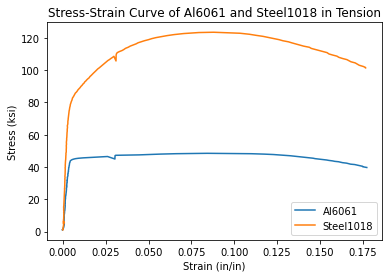

In [ ]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Stress-Strain Curve of Al6061 and Steel1018 in Tension')
ax.legend(['Al6061','Steel1018'])

plt.show()

# Calculating Tensile Strength

In [ ]:
# Calculate the tensile strength
ts_al = np.max(stress_al)
ts_steel = np.max(stress_steel)
print(f'The tensile strength of Al6061 is: {round(ts_al,3)} ksi')
print(f'The tensile strength of Steel1018 is: {round(ts_steel,3)} ksi')

The tensile strength of Al6061 is: 48.462 ksi
The tensile strength of Steel1018 is: 123.473 ksi


# Calculating Elastic Modulus

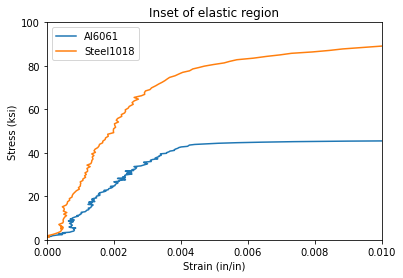

In [ ]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)

ax.set_title('Inset of elastic region')
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.legend(['Al6061','Steel1018'])

ax.set_xlim([0,0.01])
ax.set_ylim([0,100])
ax.legend(['Al6061','Steel1018'])

plt.show()

In [ ]:
# Find the elastic modulus of Al6061
# use stress and strain values from stress=0 to stress=35 ksi
linear_stress_al_mask = stress_al < 35
linear_stress_al = stress_al[linear_stress_al_mask]
linear_strain_al = strain_al[linear_stress_al_mask]
from scipy.stats import linregress

linear_regression_output = linregress(linear_strain_al, linear_stress_al)
E_al = linear_regression_output[0]

print(f'The elastic modulus of Al6061 is {round(E_al,1)} ksi')

The elastic modulus of Al6061 is 12994.6 ksi


In [ ]:
# Find the elastic modulus of Steel1018
# use stress and strain values from stress=0 to stress=55 ksi
linear_stress_steel_mask = stress_steel < 55
linear_stress_steel = stress_steel[linear_stress_steel_mask]
linear_strain_steel = strain_steel[linear_stress_steel_mask]

linear_regression_output_steel = linregress(linear_strain_steel, linear_stress_steel)
E_steel = linear_regression_output_steel[0]

print(f'The elastic modulus of Steel1018 is {round(E_steel,1)} ksi')

The elastic modulus of Steel1018 is 27869.9 ksi


# Calculating Ductility

In [ ]:
# Find the ductility for Al6061
stress_al_array = np.array(stress_al)
stress_al_last = stress_al_array[-1]
strain_al_array = np.array(strain_al)
strain_al_last = strain_al_array[-1]
EL_al = -stress_al_last/E_al + strain_al_last
print(f'The ductility of Al6061 is {round(EL_al*100,1)}%')

The ductility of Al6061 is 17.4%


In [ ]:
# Find the ductility of Steel1018
stress_steel_array = np.array(stress_steel)
stress_steel_last = stress_steel_array[-1]
strain_steel_array = np.array(strain_steel)
strain_steel_last = strain_steel_array[-1]
EL_steel = -stress_steel_last/E_steel + strain_steel_last
print(f'The ductility of Steel1018 is {round(EL_steel*100,1)}%')

The ductility of Steel1018 is 17.3%


# **DATA ANALYTICS LABORATORY**

**ATHARV KISHOR CHAUDHARI**

*B.E. - B*

*ROLL NO. 08*

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [ ]:
!cp "./drive/My Drive/Colab Notebooks/MECHANICAL PROPERTIES FOR STRESS STRAIN CURVE/Mechanical_Properties_from_Stress-Strain_Curves.ipynb" ./

In [ ]:
!jupyter nbconvert --to PDF "Mechanical_Properties_from_Stress-Strain_Curves.ipynb"

[NbConvertApp] Converting notebook Mechanical_Properties_from_Stress-Strain_Curves.ipynb to PDF
[NbConvertApp] Support files will be in Mechanical_Properties_from_Stress-Strain_Curves_files/
[NbConvertApp] Making directory ./Mechanical_Properties_from_Stress-Strain_Curves_files
[NbConvertApp] Making directory ./Mechanical_Properties_from_Stress-Strain_Curves_files
[NbConvertApp] Writing 60796 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 94514 bytes to Mechanical_Properties_from_Stress-Strain_Curves.pdf
